### Load Modules

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [30]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [31]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [32]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [33]:
np.unique(Y)

array([0, 1])

In [34]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [35]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

In [36]:
X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        ...,
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [2, 2, 2, ..., 2, 2, 2],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 0, 0],
        [2, 2, 2, ..., 2, 2, 1],
        [4, 4, 4, ..., 5, 3, 2],
        ...,
        [3, 3, 3, ..., 

### Visualize data

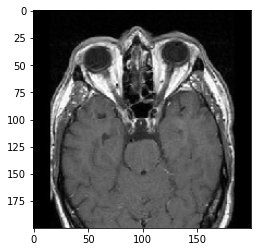

In [37]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [38]:
X_updated = X.reshape(len(X), -1)


### Split Data

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [40]:
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 2, 2],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Feature Scaling

In [41]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtest

255 0
255 0
1.0 0.0
1.0 0.0


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Feature Selection: PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [44]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [46]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)
pr=lg.predict(xtest)
accuracy_score(pr,ytest)

0.9591836734693877

In [47]:
sv = SVC()
sv.fit(xtrain, ytrain)


SVC()

### Evaluation

In [48]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))


Training Score: 1.0
Testing Score: 0.9591836734693877


In [49]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


### Prediction

In [63]:
pred = sv.predict(xtest)
pred
accuracy_score(pred,ytest)

0.963265306122449

In [51]:
misclassified=np.where(ytest!=pred)
misclassified
len(misclassified)

1

In [52]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[68],ytest[68])

Total Misclassified Samples:  9
1 0


### TEST MODEL

In [56]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

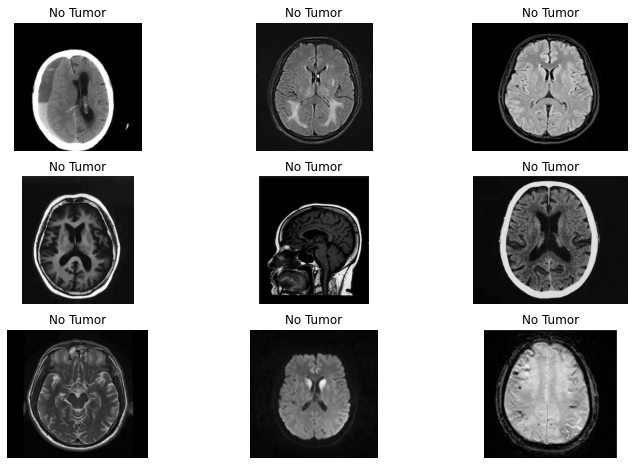

In [61]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

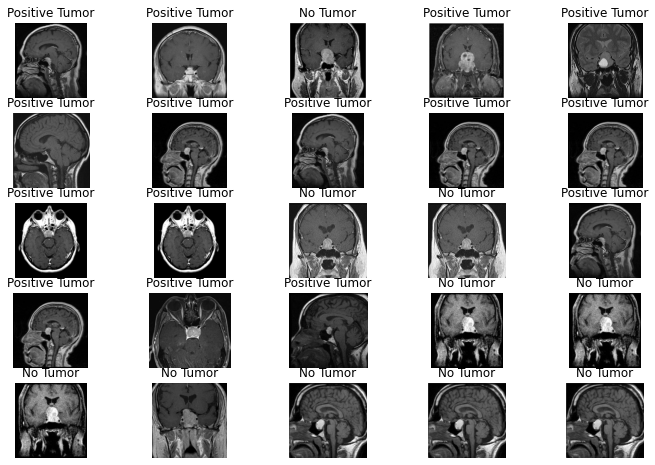

In [67]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
j=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:25]:
    plt.subplot(5,5,j)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    j+=1